### CLUSTERING ASSIGNMENT 

Problem Statement :

From the Dataset of Countries and their details:
    
- Try both K-means and Hierarchical clustering(both single and complete linkage) on this dataset to create the clusters. [Note that both the methods may not produce identical results and you might have to choose one of them for the final list of countries.]

- Analyse the clusters and identify the ones which are in dire need of aid. You can analyse the clusters by comparing how these three variables - [gdpp, child_mort and income] vary for each cluster of countries to recognise and differentiate the clusters of developed countries from the clusters of under-developed countries.

Results  Expected
1. A well-commented Jupyter notebook containing the Clustering Models(both K-means and Hierarchical Clustering) and the final list of countries.
2. Present the overall approach of the analysis in a presentation 
3. Mention the problem statement and the analysis approach.
4. Explain the results of  Clustering Model briefly.
5. Include visualisations and summarise the most important results in the presentation.

6. Make sure that you mention the final list of countries here ( Don't just mention the cluster id or cluster name here. Mention the names of all the countries.)

#### LOADING THE LIBRARIES AND DATA

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

 
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Hierarichal Clustering 
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

## Column Name	Description
* country -	Name of the country
* child_mort - 	Death of children under 5 years of age per 1000 live births
* exports -	Exports of goods and services per capita. Given as %age of the GDP per capita
* health -	Total health spending per capita. Given as %age of GDP per capita
* imports -	Imports of goods and services per capita. Given as %age of the GDP per capita
* Income -	Net income per person
* Inflation - 	The measurement of the annual growth rate of the Total GDP
* life_expec -	The average number of years a new born child would live if the current mortality patterns are to remain the same
* total_fer - The number of children that would be born to each woman if the current age-fertility rates remain the same.
* gdpp -	The GDP per capita. Calculated as the Total GDP divided by the total population.


Major Segments of assignments

- Data Quality Check: PPT
- EDA
- Outlier Treatment
- Scaling
- Checking the tendency of the data: Hopkins Test
- Checing the best value for K: ssd, silhouette method
- Perfrom KMeans with the final value of k
- Visualize the clusters using scatter plot
- Perfrom Cluster Profiling: GDPP, CHILD_MORT, INCOME
- -------------------------------------
- Hierarchical Clustering
- Single Linkage: Dendogram
- Complete Linkage: Dendogram
- Use the suitable method and perform the final cut
- Visualize the cluster
- Perfrom Cluster Profiling: GDPP, CHILD_MORT, INCOME
- --------------------------------------
- Using both the results, repor the countries that are in need of the AID

In [2]:
Country_data = pd.read_csv("D:\\UPGRAD\\Machine Learning- I\\Module -VI Assignment Clustering\\Country-data.csv")
Country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
Country_data.info()

print("\n",Country_data.isnull().sum())
'''-  Exports, heath and imports variables are in percenatge of the total GDP format.
-  Converting the aforementioned columns on the basis of GDPP. 
-  GDP data and population data is not present the data set.
'''
Country_data['exports'] = Country_data['exports']*Country_data['gdpp']/100
Country_data['imports'] = Country_data['imports']*Country_data['gdpp']/100
Country_data['health'] = Country_data['health']*Country_data['gdpp']/100

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB

 country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


In [4]:
Country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [5]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
Country_data.describe(percentiles=[0,.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
0%,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000


In [6]:
# Drop Species column
df = Country_data.drop("country", axis = 1)
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


# 1. EDA

In [7]:
f=df.columns
list(enumerate(f))

[(0, 'child_mort'),
 (1, 'exports'),
 (2, 'health'),
 (3, 'imports'),
 (4, 'income'),
 (5, 'inflation'),
 (6, 'life_expec'),
 (7, 'total_fer'),
 (8, 'gdpp')]

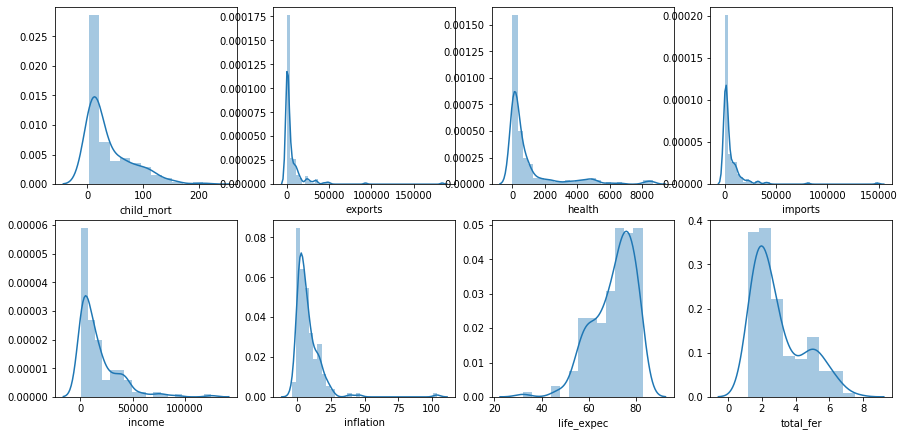

In [8]:
plt.figure(figsize = (15,15))
f = df.columns[:-1]
for i in enumerate(f):
    plt.subplot(4,4,i[0]+1)
    sns.distplot(df[i[1]])

plt.savefig('foo1.png')

Inference : 
    1. Skewness in all the columns of the data


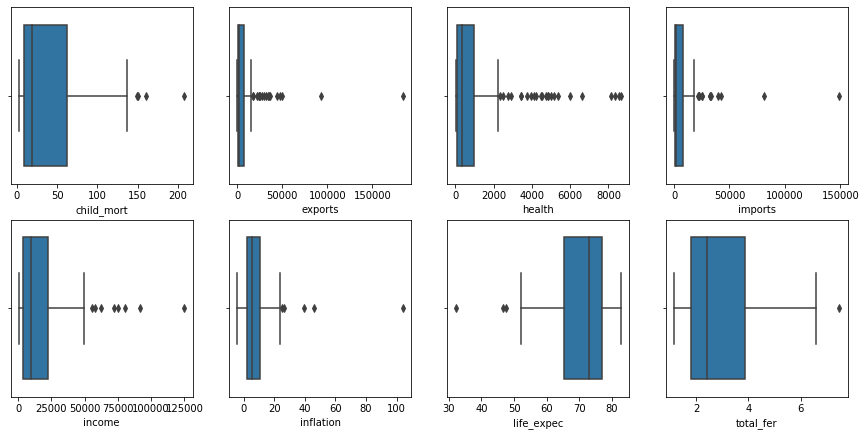

In [9]:
# To plot the box plot for all the columns
plt.figure(figsize = (15,15))
for i in enumerate(f):
    plt.subplot(4,4,i[0]+1)
    sns.boxplot(x = i[1], data =df)

plt.savefig('foo2.png')

Inference : 
    1. of few outliers in the extreme end of box plots in higher part of the quartiles.

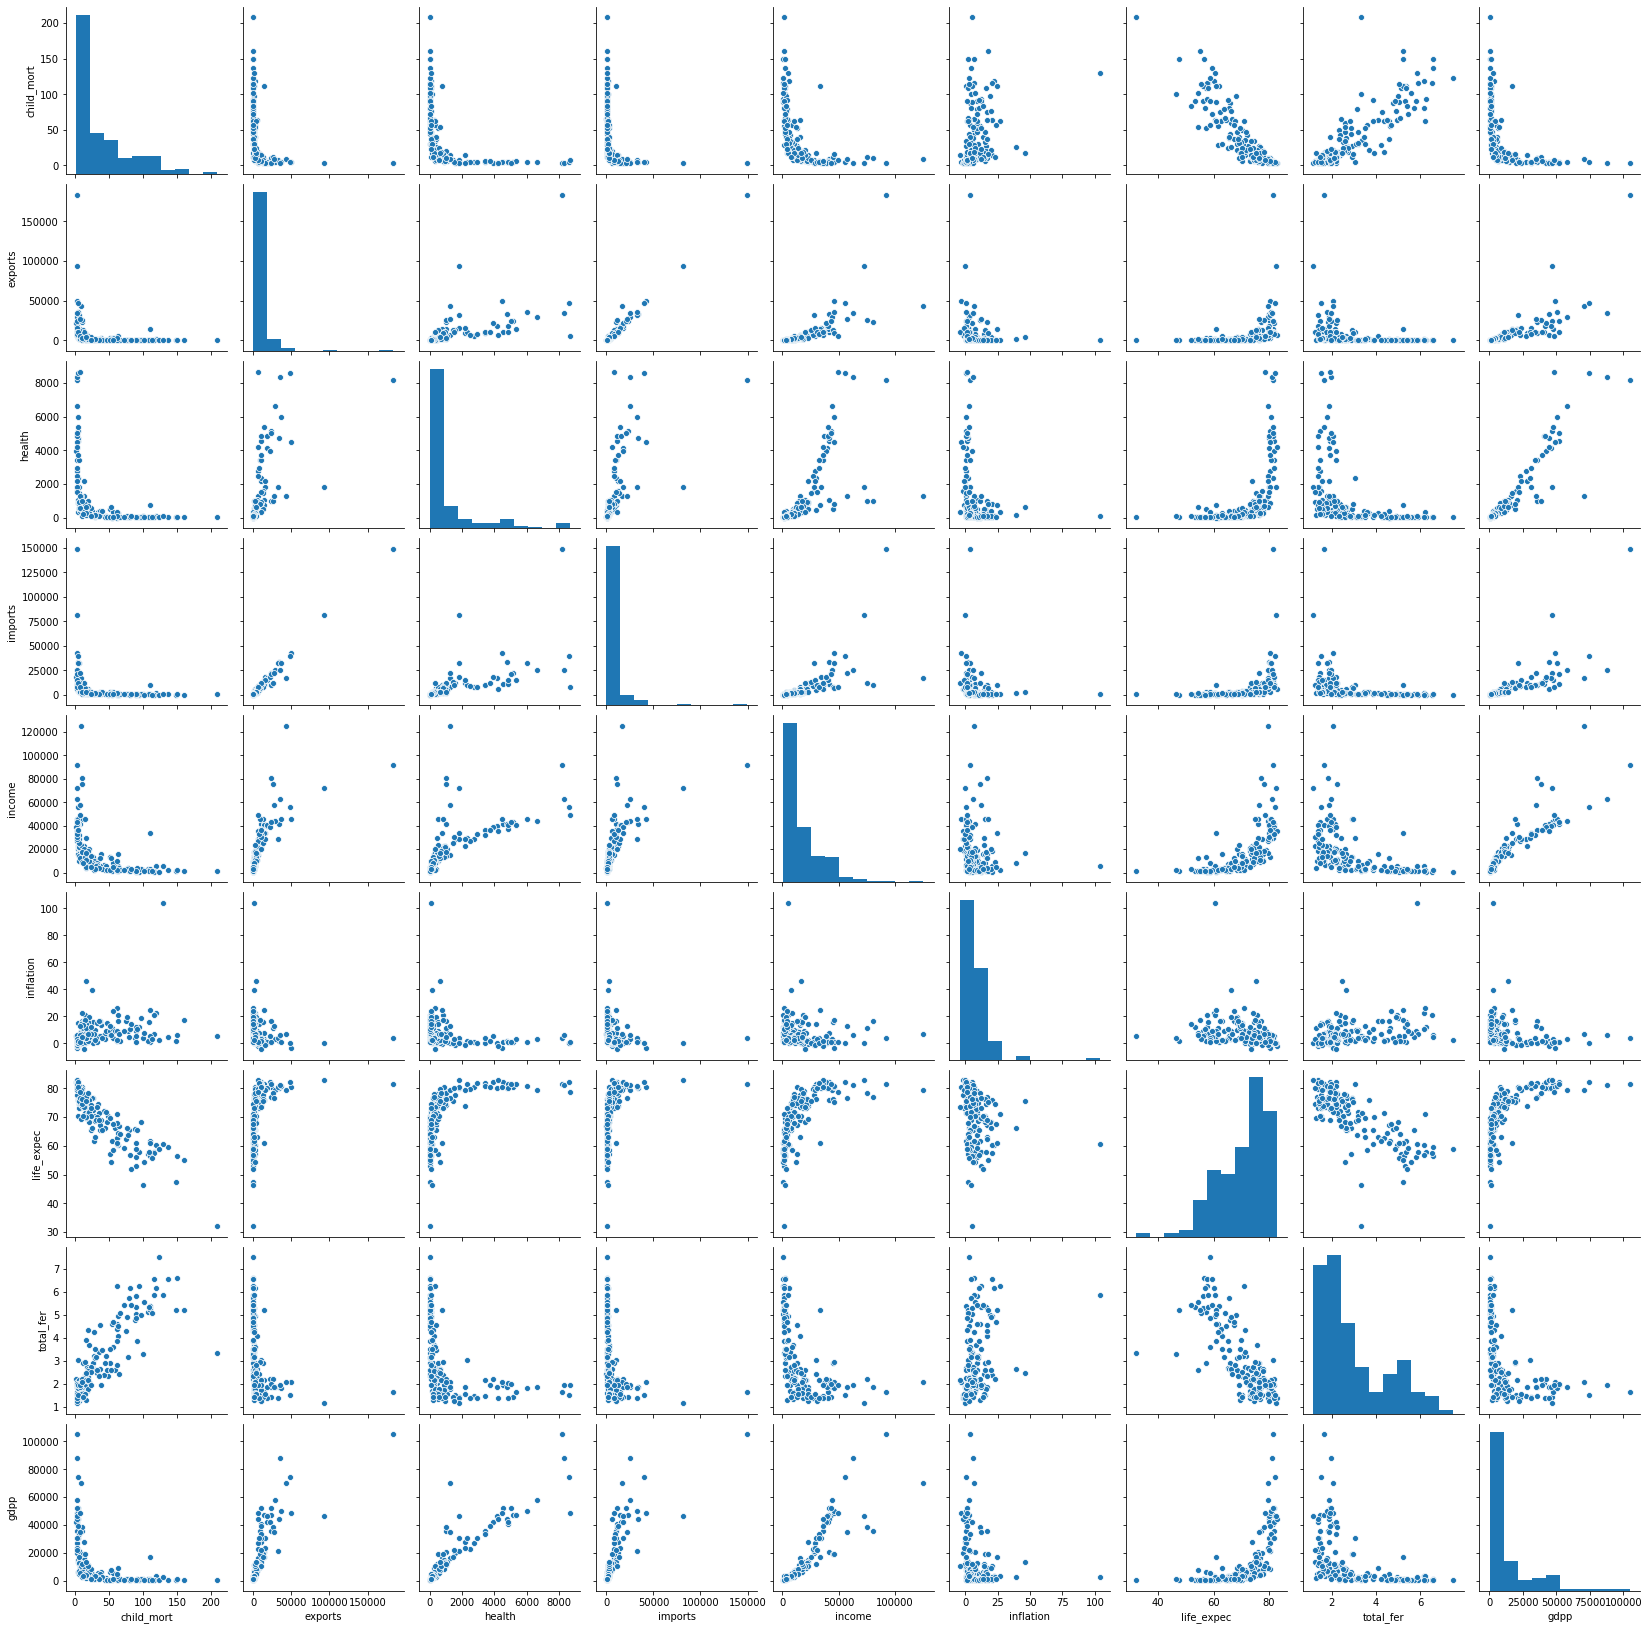

<Figure size 432x288 with 0 Axes>

In [10]:
sns.pairplot(df)
plt.show()

plt.savefig('foo3.png')

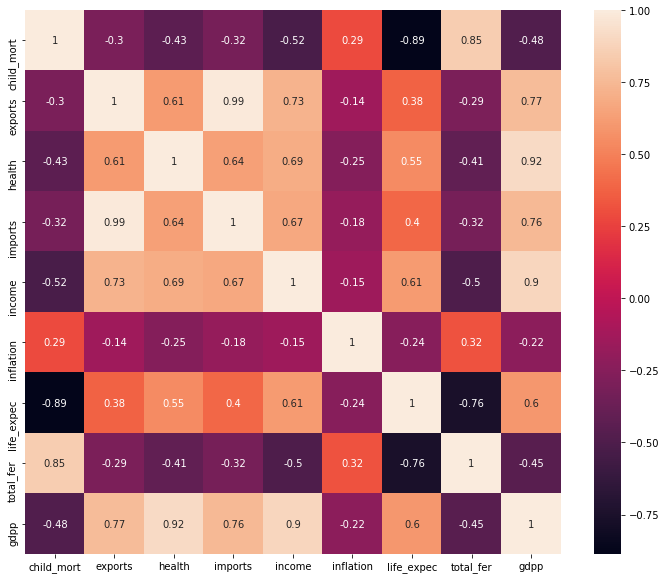

<Figure size 432x288 with 0 Axes>

In [11]:
#plotting the correlation matrix
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(),annot = True)
plt.show()

plt.savefig('foo4.png')

## HOPKINS: Cluster Tendency

In [12]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

Hopkins Test
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

1.If the value is between {0.01, ...,0.3}, the data is regularly spaced.

2.If the value is around 0.5, it is random.

3.If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [13]:
hopkins(df)

0.9789348636711624

###### Inferences:

- From the correlation map we see that
- child_mort has a strong inverse correlation with income (net income per person), life_expect(expected years of living) and gdpp(the GDP per capita), a moderate correlation with inflation(annual growth rate of the total GDP) and total_fert(fertility rate).
- income is correlated with exports and gdpp.
- exports is correlated with imports
- life_expec is correlated with income and gdpp, inversly correlated with total_fert

#### The variables can be didived into

- economic metrics: (exports, imports, income, inflation, gdpp, health),
- health metrics: (child_mort, life_expec, total_fer).

## OUTLIERS TREATMENT :

- For columns such as child_mort, inflation, total_fer --lower range outliers(capping) to be dealt with .
- But for rest of the columns deal with the upper range outliers(capping)

In [14]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
df.describe(percentiles=[0,0.05,.15,.25,.35,.5,.75,.90,.95,.99,.999])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
0%,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
5%,3.460000,70.468800,26.715920,169.281000,1213.000000,0.183400,55.780000,1.390000,465.900000
15%,4.780000,159.321600,45.634260,300.719400,1924.000000,0.989500,60.370000,1.550000,767.900000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
35%,11.850000,825.310000,144.460000,1209.682000,5846.000000,2.889000,68.530000,1.983000,2870.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000


In [15]:
df_2 = df

In [16]:
df_2.describe(percentiles=[0,0.05,.15,.25,.35,.5,.75,.90,.95,.99,.999])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
0%,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
5%,3.460000,70.468800,26.715920,169.281000,1213.000000,0.183400,55.780000,1.390000,465.900000
15%,4.780000,159.321600,45.634260,300.719400,1924.000000,0.989500,60.370000,1.550000,767.900000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
35%,11.850000,825.310000,144.460000,1209.682000,5846.000000,2.889000,68.530000,1.983000,2870.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000


In [17]:
# Outlier Treatment using IQR Method

def outlier_treatment(df, col):
    
    Q1 = df[col].quantile(0.25)

    Q3 = df[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_cap  = Q1-1.5*IQR

    higher_cap = Q3+1.5*IQR

    df.loc[(df[col] > higher_cap), col] = higher_cap
    df.loc[(df[col] < lower_cap), col] = lower_cap
    
    return df

In [18]:
df = outlier_treatment(df, 'child_mort')
df = outlier_treatment(df, 'exports')
df = outlier_treatment(df, 'health')
df = outlier_treatment(df, 'imports')
df = outlier_treatment(df, 'income')
df = outlier_treatment(df, 'inflation')
df = outlier_treatment(df, 'life_expec')
df = outlier_treatment(df, 'total_fer')
df = outlier_treatment(df, 'gdpp')

In [19]:
df.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [20]:
df_econ= df[['exports', 'health', 'imports', 'income', 'inflation','gdpp']]
df_heal= df[['child_mort','life_expec', 'total_fer']]

In [21]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,37.698204,4710.954895,680.241240,4756.898995,15921.574850,7.065066,70.663772,2.945075,10351.281437
std,38.443293,5832.960967,804.768458,5690.687520,15207.197459,6.704968,8.522535,1.505564,11612.044330
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,48.050000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,142.875000,17524.290000,2324.546750,18338.677500,51967.500000,24.160000,82.800000,7.007500,33130.000000


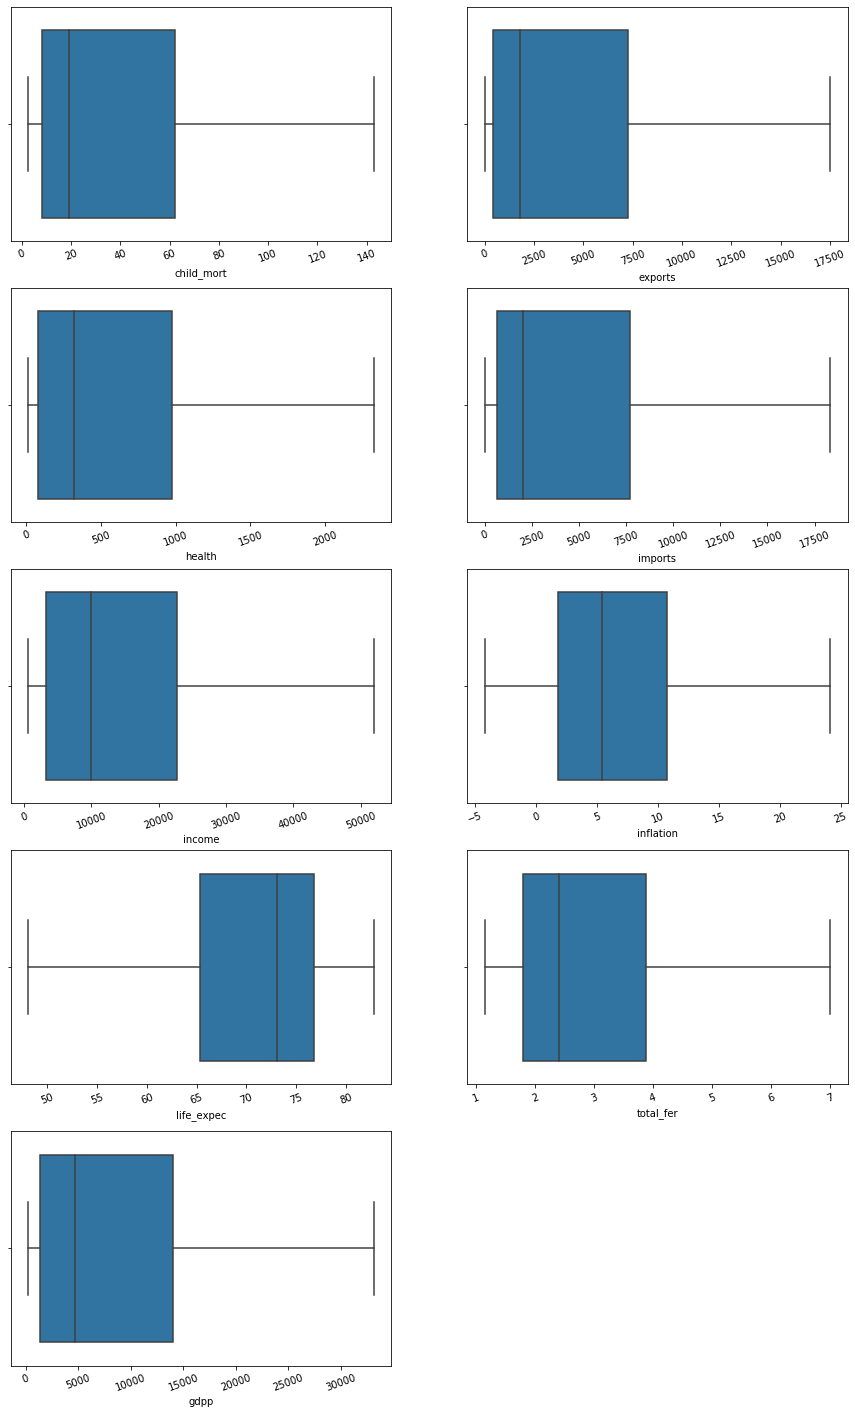

In [22]:
# Visualization Using subplot check the outliers 

# setting figure size
plt.figure(figsize=(15,25))

Features_Col = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
for i in enumerate(Features_Col): 
    ax = plt.subplot(5, 2, i[0]+1)
    sns.boxplot(df[i[1]])
    plt.xticks(rotation = 20)

plt.savefig('foo5.png')

In [23]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
df.describe(percentiles=[0,0.05,.15,.25,.35,.5,.75,.90,.95,.99,.999])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,37.698204,4710.954895,680.241240,4756.898995,15921.574850,7.065066,70.663772,2.945075,10351.281437
std,38.443293,5832.960967,804.768458,5690.687520,15207.197459,6.704968,8.522535,1.505564,11612.044330
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,48.050000,1.150000,231.000000
0%,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,48.050000,1.150000,231.000000
5%,3.460000,70.468800,26.715920,169.281000,1213.000000,0.183400,55.780000,1.390000,465.900000
15%,4.780000,159.321600,45.634260,300.719400,1924.000000,0.989500,60.370000,1.550000,767.900000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
35%,11.850000,825.310000,144.460000,1209.682000,5846.000000,2.889000,68.530000,1.983000,2870.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000


# 3. Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df1 = ss.fit_transform(df)
df1

array([[ 1.36980194, -0.80056371, -0.79556251, ..., -1.70222504,
         1.91527602, -0.84634107],
       [-0.55046422, -0.61314982, -0.51391972, ...,  0.66332125,
        -0.86277926, -0.54082746],
       [-0.27129509, -0.51557561, -0.6160104 , ...,  0.68685903,
        -0.03669088, -0.50886816],
       ...,
       [-0.37565738, -0.64788476, -0.73612924, ...,  0.28671687,
        -0.66291917, -0.78095407],
       [ 0.48533152, -0.74249447, -0.76323195, ..., -0.37234081,
         1.14914567, -0.78095407],
       [ 1.18455887, -0.71718267, -0.7406285 , ..., -2.19651829,
         1.63547189, -0.7679976 ]])

In [25]:
df1 = pd.DataFrame(df1)
df1.columns = df.columns
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.369802,-0.800564,-0.795563,-0.794660,-0.943936,0.355270,-1.702225,1.915276,-0.846341
1,-0.550464,-0.613150,-0.513920,-0.488076,-0.395181,-0.385208,0.663321,-0.862779,-0.540827
2,-0.271295,-0.515576,-0.616010,-0.591590,-0.199291,1.351551,0.686859,-0.036691,-0.508868
3,2.121210,-0.431911,-0.722418,-0.571509,-0.660984,2.293979,-1.243238,2.141784,-0.589198
4,-0.714835,0.144450,0.069070,0.428104,0.209637,-0.841463,0.722166,-0.543003,0.159686


In [26]:
df1_econ= df1[['exports', 'health', 'imports', 'income', 'inflation','gdpp']]
df1_heal= df1[['child_mort','life_expec', 'total_fer']]

# Find the best value of K

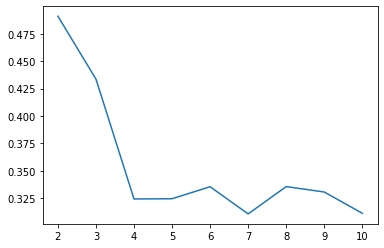

In [27]:
from sklearn.metrics import silhouette_score
# We looks at the maximum value

ss = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k).fit(df1)
    ss.append([k, silhouette_score(df1, kmeans.labels_)])
    
sil = pd.DataFrame(ss)
plt.plot(sil[0],sil[1])

plt.savefig('foo6.png')

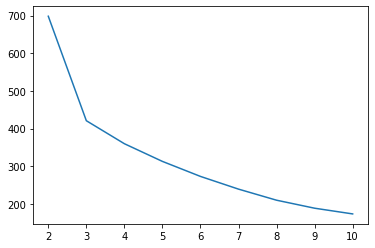

In [28]:
# ssd elbow curve
ssd = []
for k in range(2,11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ssd.append([k, kmean.inertia_])

ssd = pd.DataFrame(ssd)
plt.plot(ssd[0], ssd[1])

plt.savefig('foo7.png')

In [29]:
kmean = KMeans(n_clusters = 3, random_state = 0)
kmean.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

#### Clusters Number : 3 is considered on the basis of the aforementioned curves as well as business acumen. 
    Basically we tend to identify the countries as developed , undeveloped and under-developing status on the basis of economica and their health statistics.
    Thus required clusters shall be 3. Also, we tend to identify the cluster wherein we can further sort it to detail conclusion that the which countries requires the most need for aid. 

In [30]:
kmean.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1,
       1, 2, 2, 2, 2, 0, 0, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2,
       0, 1, 1, 2, 2, 2, 0, 1, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 1, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 1, 0, 2, 2,
       0, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0])

In [31]:
kmean.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1,
       1, 2, 2, 2, 2, 0, 0, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2,
       0, 1, 1, 2, 2, 2, 0, 1, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 1, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 1, 0, 2, 2,
       0, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0])

In [32]:
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.369802,-0.800564,-0.795563,-0.794660,-0.943936,0.355270,-1.702225,1.915276,-0.846341
1,-0.550464,-0.613150,-0.513920,-0.488076,-0.395181,-0.385208,0.663321,-0.862779,-0.540827
2,-0.271295,-0.515576,-0.616010,-0.591590,-0.199291,1.351551,0.686859,-0.036691,-0.508868
3,2.121210,-0.431911,-0.722418,-0.571509,-0.660984,2.293979,-1.243238,2.141784,-0.589198
4,-0.714835,0.144450,0.069070,0.428104,0.209637,-0.841463,0.722166,-0.543003,0.159686


In [33]:
df['cluster_id'] = kmean.labels_

In [34]:
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2


In [35]:
# Let's check how may data points we have in each cluster
df.cluster_id.value_counts()

2    78
0    48
1    41
Name: cluster_id, dtype: int64

# Plotting

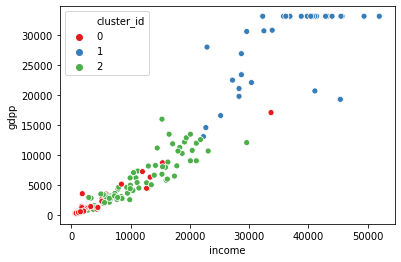

In [36]:
sns.scatterplot(x = 'income', y ='gdpp', hue = 'cluster_id', data =df, palette = 'Set1')

plt.savefig('foo8.png')

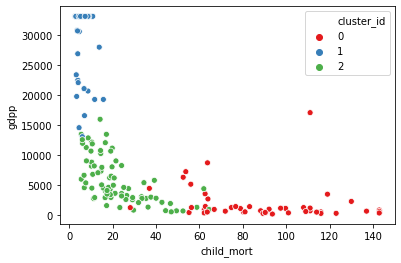

In [37]:
sns.scatterplot(x = 'child_mort', y ='gdpp', hue = 'cluster_id', data =df, palette = 'Set1')
plt.savefig('foo8II.png')

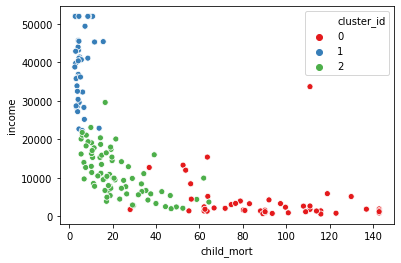

In [38]:
sns.scatterplot(x = 'child_mort', y ='income', hue = 'cluster_id', data =df, palette = 'Set1')

plt.savefig('foo9.png')

### Based on the  Cluster Numbers the segmentation on the basis of K-Means methodology Profiles, Following are the derivatives. 

Cluster – 0 : UN-DEVELOPED COUNTRIES
Child Mortality 	– Extremely High 
Income 		– Extremely Low
GDPP 		– Extremely Low   
Cluster – 1 : DEVELOPING COUNTRIES
Child Mortality 	–  Not so High 
Income 		– Not so Low
GDPP 		– Not so Low   
Cluster – 2 : DEVELOPING COUNTRIES
Child Mortality 	–  Low
Income 		–  High
GDPP 		–  High


# Cluster Profiling
To make sense out of the cluster

## Assignment

- GDPP
- Income
- Child_Mort
 
 In the case of your assignment, objective is to find that cluster for which you have LOW GDPP, LOW INCOME and HIGH CHILD_MORT for segmentation

In [39]:
df[['gdpp', 'income', 'child_mort','cluster_id']].groupby('cluster_id').mean()

,gdpp,income,child_mort
cluster_id,,,
0,1909.208333,3897.354167,89.620833
1,28969.512195,38988.780488,5.651220
2,5759.897436,11196.025641,22.591026


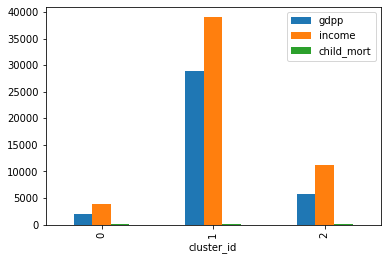

In [40]:
df[['gdpp', 'income', 'child_mort','cluster_id']].groupby('cluster_id').mean().plot(kind = 'bar')
# BOX PLOTS

plt.savefig('foo10.png')

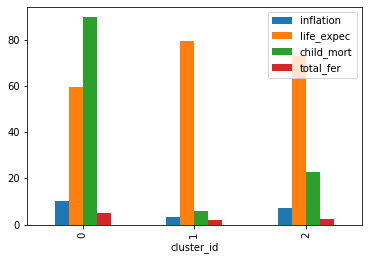

In [41]:
df[['inflation', 'life_expec', 'child_mort','total_fer','cluster_id']].groupby('cluster_id').mean().plot(kind = 'bar')

plt.savefig('foo11.png')

In [42]:
df_3 = pd.concat([df,Country_data[["country"]]],axis=1)

Once you have identified the cluster that follows the profile which we are going for, the next steps is to find the top countries are that in need of the AID

In [44]:
print("Top 10 Countries Requiring the Aid are as follows:")
c1=df_3[df["cluster_id"]==0]
c1.sort_values(by = ["child_mort",'income', 'gdpp'], ascending = [False,True, True]).head(10)

Top 10 Countries Requiring the Aid are as follows:


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,country
31,142.875,52.628,17.7508,118.190,888.0,2.01,48.05,5.2100,446.0,0,Central African Republic
132,142.875,67.032,52.2690,137.655,1220.0,17.20,55.00,5.2000,399.0,0,Sierra Leone
66,142.875,101.286,45.7442,428.314,1500.0,5.45,48.05,3.3300,662.0,0,Haiti
32,142.875,330.096,40.6341,390.195,1930.0,6.39,56.50,6.5900,897.0,0,Chad
97,137.000,161.424,35.2584,248.508,1870.0,4.37,59.50,6.5500,708.0,0,Mali
113,130.000,589.490,118.1310,405.420,5150.0,24.16,60.50,5.8400,2330.0,0,Nigeria
112,123.000,77.256,17.9568,170.868,814.0,2.55,58.80,7.0075,348.0,0,Niger
3,119.000,2199.190,100.6050,1514.370,5900.0,22.40,60.10,6.1600,3530.0,0,Angola
37,116.000,137.274,26.4194,165.664,609.0,20.80,57.50,6.5400,334.0,0,"Congo, Dem. Rep."
25,116.000,110.400,38.7550,170.200,1430.0,6.81,57.90,5.8700,575.0,0,Burkina Faso


# HIERARICHAL CLUSTERING

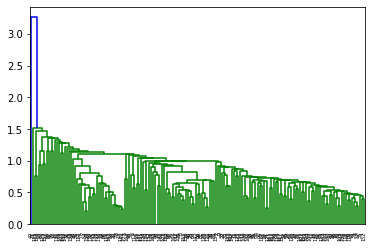

<Figure size 432x288 with 0 Axes>

In [45]:
#single linkage
mergings = linkage(df1, method = "single", metric = "euclidean")
dendrogram(mergings)
plt.show()

plt.savefig('foo12.png')

No - Major Inference Can be made from the single Linkage.

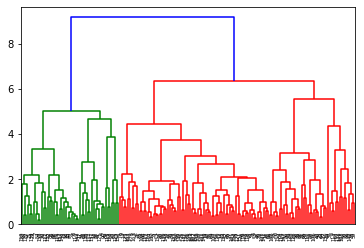

<Figure size 432x288 with 0 Axes>

In [46]:
# complete linkage 
mergings = linkage(df1, method = "complete", metric = "euclidean")
dendrogram(mergings)
plt.show()

plt.savefig('foo13.png')

Considering the the cut at 6 , Cluster Number - 3 

In [47]:
# 3 clusters 
cut_tree(mergings, n_clusters = 3).shape

(167, 1)

In [48]:
# 3 clusters 
cluster_labels= cut_tree(mergings, n_clusters = 3).reshape(-1,)
cluster_labels

array([0, 1, 1, 0, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 2, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 2, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 1, 2, 1, 0, 2, 1, 0,
       0, 2, 2, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       2, 2, 0, 0, 2, 2, 0, 1, 1, 1, 1, 2, 2, 2, 1, 1, 0, 1, 2, 0, 1, 2,
       0, 2, 2, 2, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [49]:
df["cluster_labels"] = cluster_labels
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2,1
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2,1
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2,2


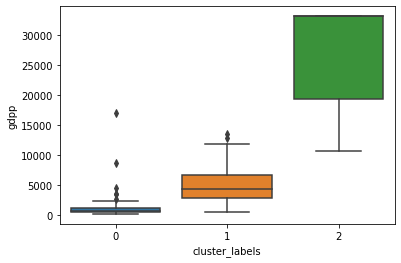

<Figure size 432x288 with 0 Axes>

In [50]:
#plots
sns.boxplot(x = "cluster_labels",y = "gdpp", data=df)
plt.show()

plt.savefig('foo14.png')

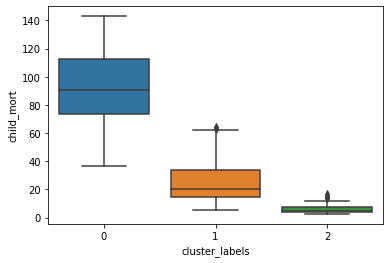

<Figure size 432x288 with 0 Axes>

In [51]:
#plots
sns.boxplot(x = "cluster_labels",y = "child_mort", data=df)
plt.show()

plt.savefig('foo15.png')

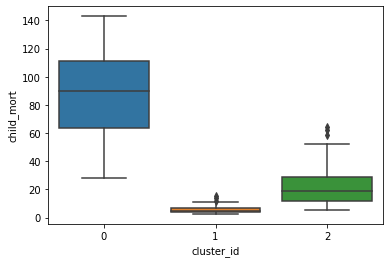

<Figure size 432x288 with 0 Axes>

In [52]:
#plots
sns.boxplot(x = "cluster_id",y = "child_mort", data=df)
plt.show()

plt.savefig('foo16.png')

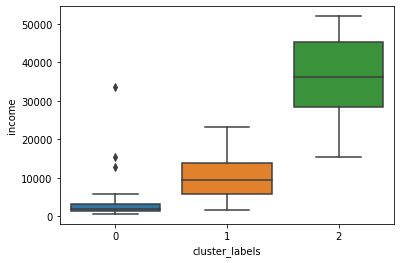

<Figure size 432x288 with 0 Axes>

In [53]:
#plots
sns.boxplot(x = "cluster_labels",y = "income", data=df)
plt.show()

plt.savefig('foo17.png')

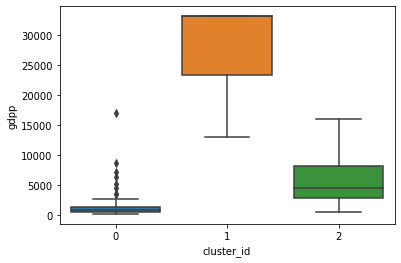

<Figure size 432x288 with 0 Axes>

In [54]:
#plots
sns.boxplot(x = "cluster_id",y = "gdpp", data=df)
plt.show()

plt.savefig('foo18.png')

In [55]:
Cluster_GDPP=pd.DataFrame(df.groupby(["cluster_id"]).gdpp.mean())
Cluster_child_mort=pd.DataFrame(df.groupby(["cluster_id"]).child_mort.mean())
Cluster_exports=pd.DataFrame(df.groupby(["cluster_id"]).exports.mean())
Cluster_income=pd.DataFrame(df.groupby(["cluster_id"]).income.mean())
Cluster_health=pd.DataFrame(df.groupby(["cluster_id"]).health.mean())
Cluster_imports=pd.DataFrame(df.groupby(["cluster_id"]).imports.mean())
Cluster_inflation=pd.DataFrame(df.groupby(["cluster_id"]).inflation.mean())
Cluster_life_expec=pd.DataFrame(df.groupby(["cluster_id"]).life_expec.mean())
Cluster_total_fer=pd.DataFrame(df.groupby(["cluster_id"]).total_fer.mean())

In [56]:
df_2 = pd.concat([Cluster_GDPP,Cluster_child_mort,Cluster_income,Cluster_exports,Cluster_health,
                Cluster_imports,Cluster_inflation,Cluster_life_expec,Cluster_total_fer], axis=1)

In [57]:
df_2

,gdpp,child_mort,income,exports,health,imports,inflation,life_expec,total_fer
cluster_id,,,,,,,,,
0,1909.208333,89.620833,3897.354167,879.063521,114.821765,827.028771,10.183646,59.615625,4.982031
1,28969.512195,5.651220,38988.780488,13652.595610,1928.315171,13444.810488,3.235171,79.514634,1.799756
2,5759.897436,22.591026,11196.025641,2368.948699,372.152826,2608.557963,7.159090,72.810256,2.293590


In [58]:
Cluster_GDPP2=pd.DataFrame(df.groupby(["cluster_labels"]).gdpp.mean())
Cluster_child_mort2=pd.DataFrame(df.groupby(["cluster_labels"]).child_mort.mean())
Cluster_exports2=pd.DataFrame(df.groupby(["cluster_labels"]).exports.mean())
Cluster_income2=pd.DataFrame(df.groupby(["cluster_labels"]).income.mean())
Cluster_health2=pd.DataFrame(df.groupby(["cluster_labels"]).health.mean())
Cluster_imports2=pd.DataFrame(df.groupby(["cluster_labels"]).imports.mean())
Cluster_inflation2=pd.DataFrame(df.groupby(["cluster_labels"]).inflation.mean())
Cluster_life_expec2=pd.DataFrame(df.groupby(["cluster_labels"]).life_expec.mean())
Cluster_total_fer2=pd.DataFrame(df.groupby(["cluster_labels"]).total_fer.mean())

In [59]:
df_5 = pd.concat([Cluster_GDPP2,Cluster_child_mort2,Cluster_income2,Cluster_exports2,Cluster_health2,
                Cluster_imports2,Cluster_inflation2,Cluster_life_expec2,Cluster_total_fer2], axis=1)

In [60]:
df_5.head()

,gdpp,child_mort,income,exports,health,imports,inflation,life_expec,total_fer
cluster_labels,,,,,,,,,
0,1628.883721,94.158140,3483.790698,791.381605,86.116644,675.739326,10.736163,59.747674,5.162500
1,4938.293333,25.789333,9931.466667,1852.959180,325.354792,2101.784148,7.596920,71.596000,2.423200
2,26290.816327,6.379592,36004.897959,12525.063673,1744.809429,12402.276122,3.029429,78.816327,1.797959


In [61]:
df["cluster_id"].value_counts()


2    78
0    48
1    41
Name: cluster_id, dtype: int64

In [76]:
df["cluster_labels"].value_counts()

1    75
2    49
0    43
Name: cluster_labels, dtype: int64

###  INFERENCE HIERARCHAL CLUSTERING (Based on the mean values of the countries): 

 Cluster – 0 : Undeveloped Countries  (43 Countries)

Cluster – 1  : Under-Developing Countries  (49 Countries) 

Cluster – 2 : Developed Countries
(75 Countries)


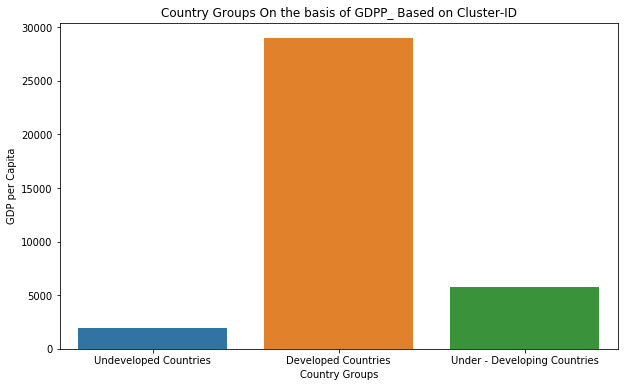

<Figure size 432x288 with 0 Axes>

In [63]:
fig = plt.figure(figsize = (10,6))
df_2.rename(index={0: 'Undeveloped Countries'},inplace = True)
df_2.rename(index={1: 'Developed Countries'},inplace = True)
df_2.rename(index={2: 'Under - Developing Countries'},inplace = True)
s=sns.barplot(x=df_2.index,y='gdpp',data=df_2)
plt.xlabel('Country Groups', fontsize=10)
plt.ylabel('GDP per Capita', fontsize=10)
plt.title('Country Groups On the basis of GDPP_ Based on Cluster-ID')
plt.show()

plt.savefig('foo19.png')

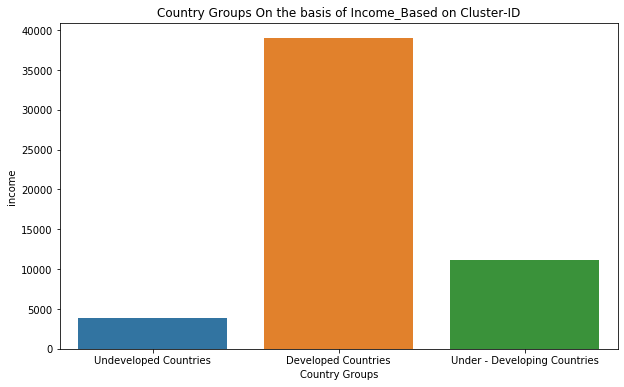

<Figure size 432x288 with 0 Axes>

In [64]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x=df_2.index,y='income',data=df_2)
plt.xlabel('Country Groups', fontsize=10)
plt.title('Country Groups On the basis of Income_Based on Cluster-ID')
plt.show()

plt.savefig('foo20.png')

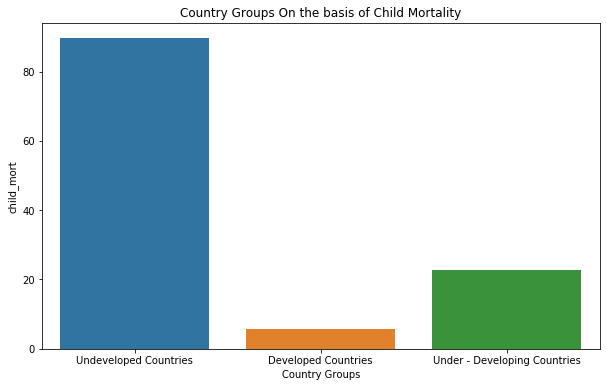

<Figure size 432x288 with 0 Axes>

In [65]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x=df_2.index,y='child_mort',data=df_2)
plt.xlabel('Country Groups', fontsize=10)
plt.title('Country Groups On the basis of Child Mortality')
plt.show()

plt.savefig('foo21.png')

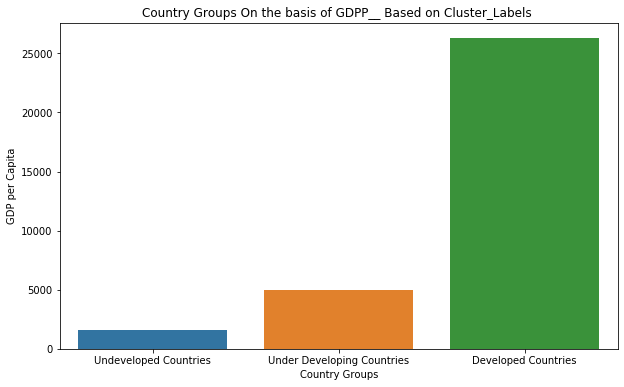

<Figure size 432x288 with 0 Axes>

In [66]:
fig = plt.figure(figsize = (10,6))
df_5.rename(index={0: 'Undeveloped Countries'},inplace = True)
df_5.rename(index={1: 'Under Developing Countries'},inplace = True)
df_5.rename(index={2: 'Developed Countries'},inplace = True)
s=sns.barplot(x=df_5.index,y='gdpp',data=df_5)
plt.xlabel('Country Groups', fontsize=10)
plt.ylabel('GDP per Capita', fontsize=10)
plt.title('Country Groups On the basis of GDPP__ Based on Cluster_Labels ')
plt.show()

plt.savefig('foo22.png')

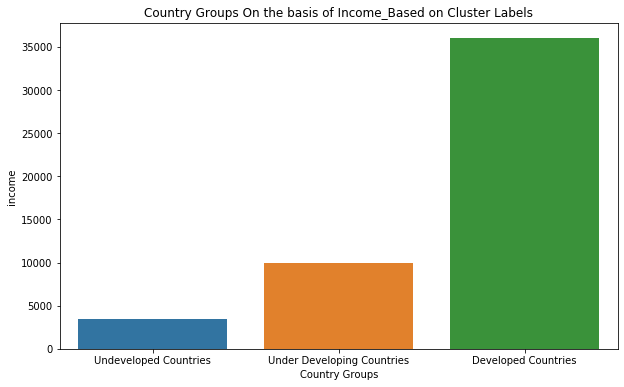

<Figure size 432x288 with 0 Axes>

In [67]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x=df_5.index,y='income',data=df_5)
plt.xlabel('Country Groups', fontsize=10)
plt.title('Country Groups On the basis of Income_Based on Cluster Labels')

plt.show()

plt.savefig('foo23.png')

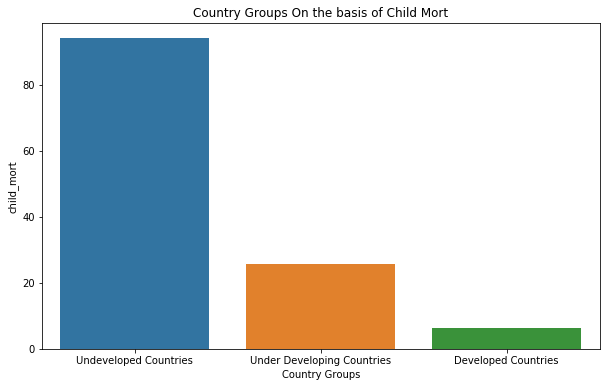

<Figure size 432x288 with 0 Axes>

In [68]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x=df_5.index,y='child_mort',data=df_5)
plt.xlabel('Country Groups', fontsize=10)
plt.title('Country Groups On the basis of Child Mort')
plt.show()

plt.savefig('foo24.png')

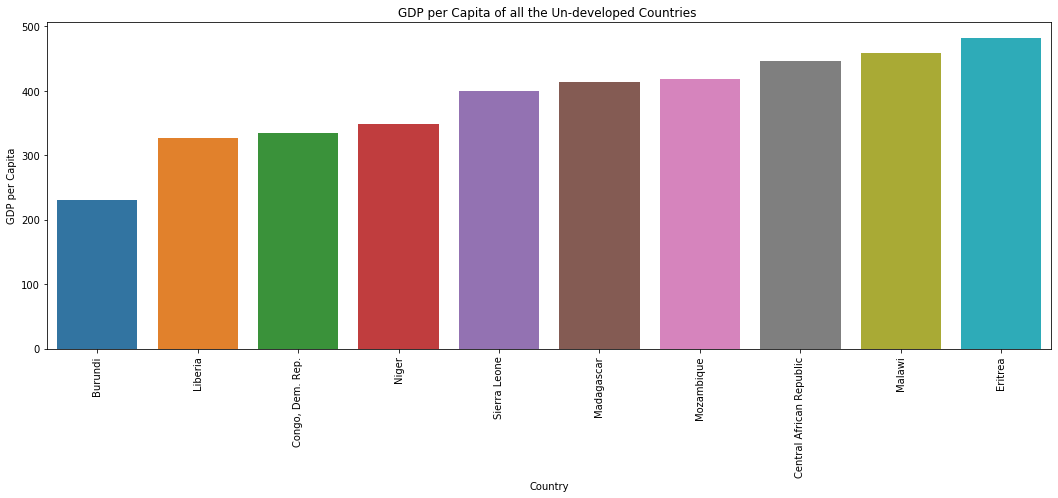

<Figure size 432x288 with 0 Axes>

In [69]:
fig = plt.figure(figsize = (18,6))
s=sns.barplot(x='country',y='gdpp',data=df_3[df["cluster_id"]==0].sort_values(by=["gdpp"]).head(10))
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.xlabel('Country', fontsize=10)
plt.ylabel('GDP per Capita', fontsize=10)
plt.title('GDP per Capita of all the Un-developed Countries ')
plt.show()

plt.savefig('foo25.png')

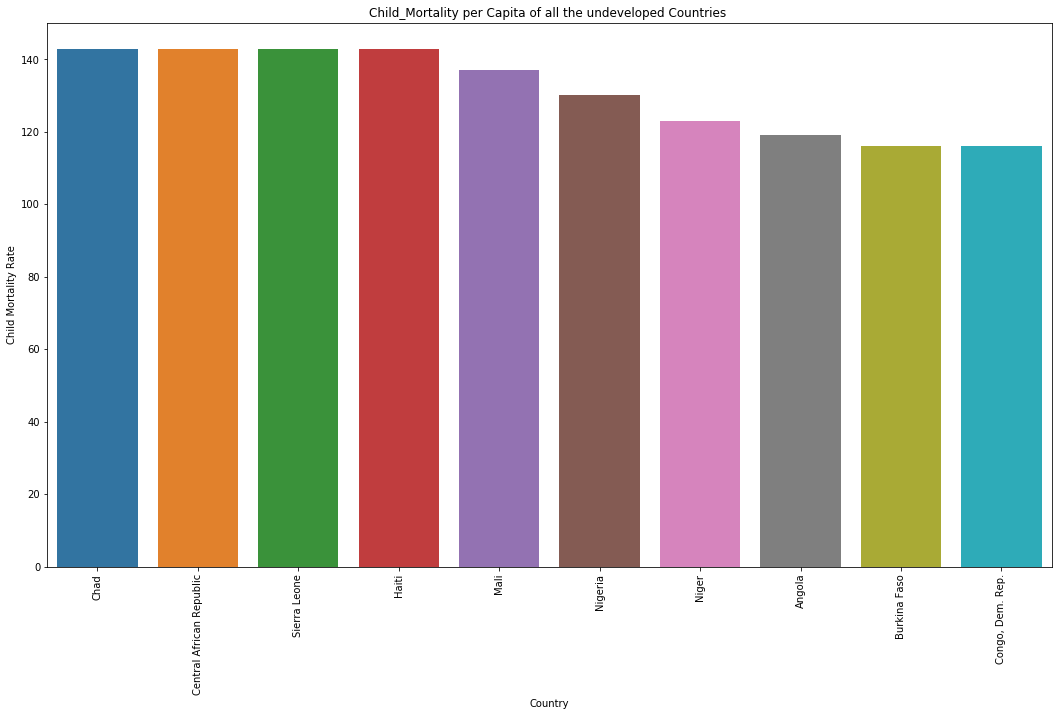

<Figure size 432x288 with 0 Axes>

In [70]:
fig = plt.figure(figsize = (18,10))
s=sns.barplot(x='country',y='child_mort',data=df_3[df["cluster_id"]==0].sort_values(by = ['child_mort'], ascending = [False]).head(10))
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.xlabel('Country', fontsize=10)
plt.ylabel('Child Mortality Rate', fontsize=10)
plt.title('Child_Mortality per Capita of all the undeveloped Countries ')
plt.show()

plt.savefig('foo26.png')

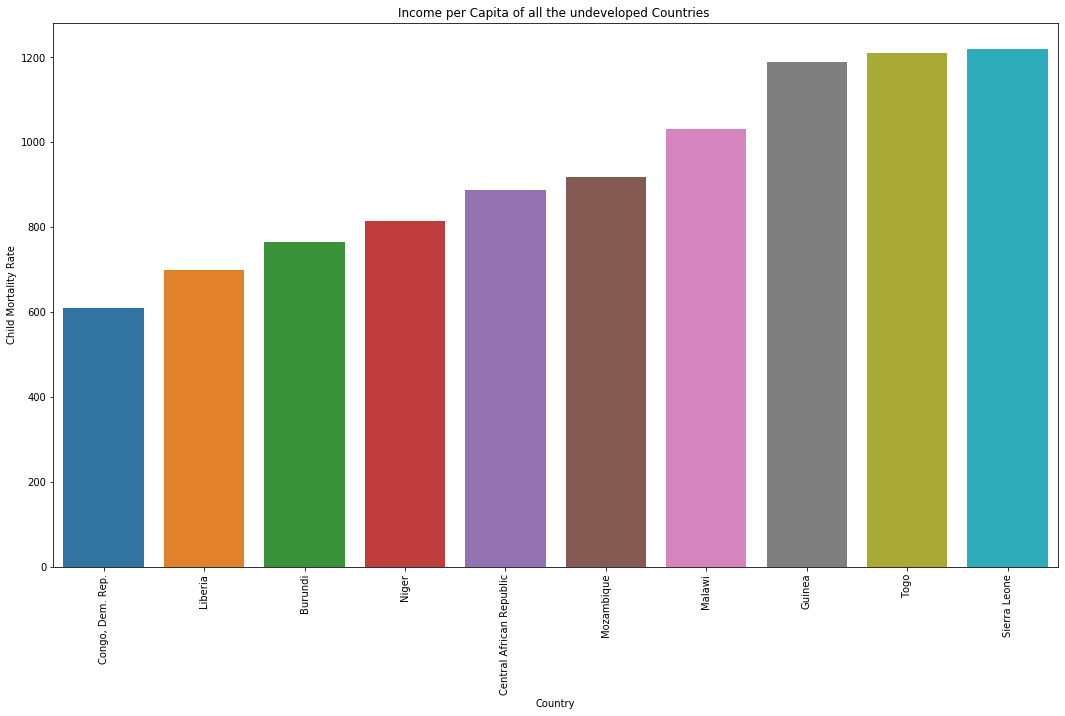

<Figure size 432x288 with 0 Axes>

In [71]:
fig = plt.figure(figsize = (18,10))
s=sns.barplot(x='country',y='income',data=df_3[df["cluster_id"]==0].sort_values(by = ['income'], ascending = [True]).head(10))
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.xlabel('Country', fontsize=10)
plt.ylabel('Child Mortality Rate', fontsize=10)
plt.title('Income per Capita of all the undeveloped Countries ')
plt.show()

plt.savefig('foo27.png')

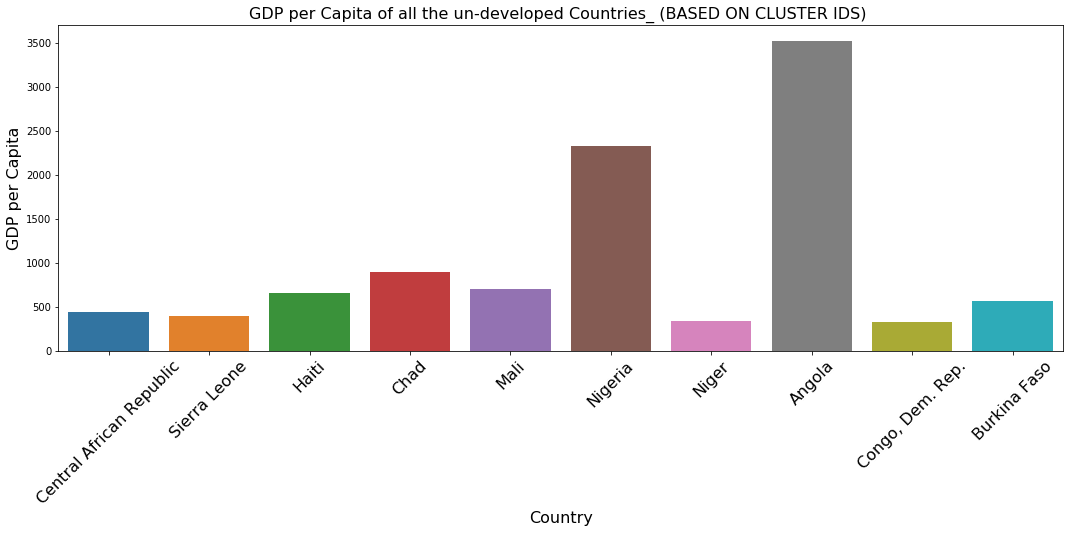

<Figure size 432x288 with 0 Axes>

In [72]:
fig = plt.figure(figsize = (18,6))
s=sns.barplot(x='country',y='gdpp',data=df_3[df["cluster_id"]==0].sort_values(by = ["child_mort",'income', 'gdpp'], ascending = [False,True, True]).head(10))
s.set_xticklabels(s.get_xticklabels(),rotation=45, fontsize=16)
plt.xlabel('Country', fontsize=16)
plt.ylabel('GDP per Capita', fontsize=16)
plt.title('GDP per Capita of all the un-developed Countries_ (BASED ON CLUSTER IDS) ', fontsize=16)
plt.show()

plt.savefig('foo28.png')

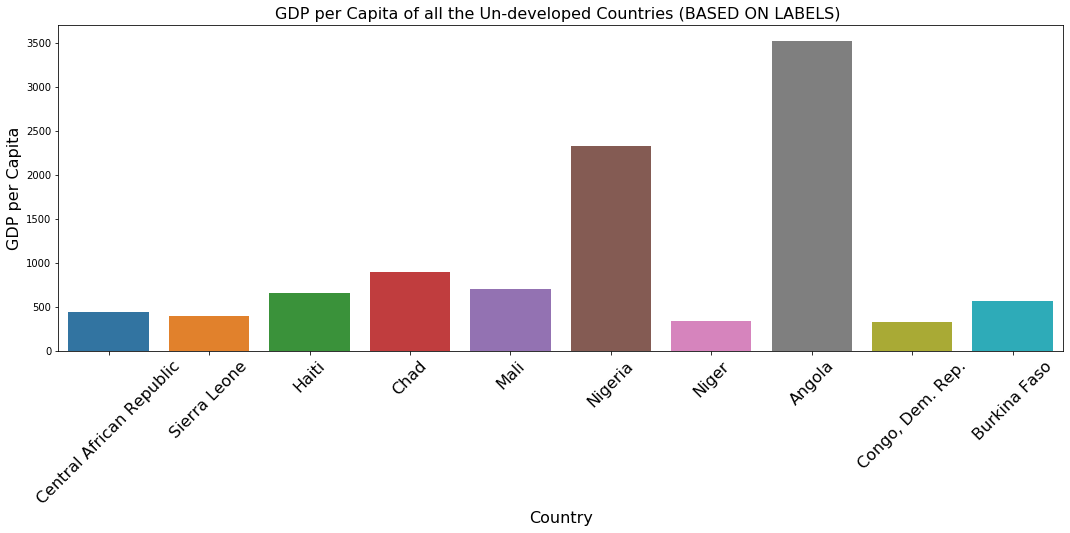

<Figure size 432x288 with 0 Axes>

In [73]:
fig = plt.figure(figsize = (18,6))
s=sns.barplot(x='country',y='gdpp',data=df_3[df["cluster_labels"]==0].sort_values(by = ["child_mort",'income', 'gdpp'], ascending = [False,True, True]).head(10))
s.set_xticklabels(s.get_xticklabels(),rotation=45, fontsize=16)
plt.xlabel('Country', fontsize=16)
plt.ylabel('GDP per Capita', fontsize=16)
plt.title('GDP per Capita of all the Un-developed Countries (BASED ON LABELS) ', fontsize=16)
plt.show()

plt.savefig('foo29.png')

In [74]:
A=df_3[df["cluster_labels"]==0].sort_values(by = ["child_mort",'income', 'gdpp'], ascending = [False,True, True])

#### The top 10 Countries requiring aid are : ( On the basis of Heirarchal Clustering)

In [75]:
print("Contries Requirng Aid \n")
print(A["country"].head(10))

Contries Requirng Aid 

31     Central African Republic
132                Sierra Leone
66                        Haiti
32                         Chad
97                         Mali
113                     Nigeria
112                       Niger
3                        Angola
37             Congo, Dem. Rep.
25                 Burkina Faso
Name: country, dtype: object
